In [6]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data, watershed_binary
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
targetdir = '/Users/aimachine/Documents/MultiCell/Integer/'

Binaryimage = '/Users/aimachine/Documents/MultiCell/Binary.tif'

In [8]:
MakePath(targetdir) 

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


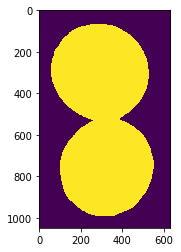

In [17]:
size = 2500
gaussradius = 5
kernel = 9
peakpercent = 1
Binary = imread(Binaryimage)
plt.imshow(Binary[0,:,:])
global integerimage
integerimage = Binary
for t in range(0,int(Binary.shape[0])):
    
    integerimage[t,:,:] = watershed_binary(Binary[t,:,:], size,gaussradius, kernel, peakpercent)
    
  

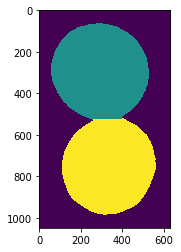

In [18]:
plt.imshow(integerimage[17,:,:])  
plt.show()
axes = 'TYX'
save_tiff_imagej_compatible((targetdir + 'SuperPixel' + os.path.basename(Binaryimage)) , integerimage, axes)
      

In [31]:
labelzero = np.amin(integerimage)
labelmax = np.amax(integerimage)

for i in range(labelzero + 1, labelmax+ 1):
    
    binaryimage = np.zeros([integerimage.shape[0], integerimage.shape[1], integerimage.shape[2]])
    for t in range(0,int(integerimage.shape[0])):
        
              smallimg = integerimage[t,:,:]
            
              pureimg = smallimg == i
              binaryimage[t,:,:] = pureimg
        
    save_tiff_imagej_compatible((targetdir + 'Cut' + str(i) +  os.path.basename(Binaryimage) ) , binaryimage, axes)
 

/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
/Users/aimachine/PyImage/utils/Normalize.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]
